In [10]:

#<<<<<<<<<<<<<<<<<<<<#          Simulacion RS        #>>>>>>>>>>>>>>>>>>>># V 1.0


import random, numpy as np, pandas as pd, matplotlib.pyplot as plt
from pandas import Series, DataFrame
#pd.options.mode.chained_assignment = None 


TamañoDeLaMuestra = 1000 # Cantidad de sujetos que quiero en la muestra.
QOpinionesExpuestas = 20 #Cantidad de opiniones que quiero que vea cada agente
QVecesMuestroOpinion = 50 # Cantidad de veces maxima que se muestra una opinion

In [11]:

# Defino a los agentes.

class Person (object):
    def __init__ (self, opinion,ID):
        self.Oi = opinion
        self.ID = ID # Genero un ID para cada agente
        self.IdeasVistas = [] # Me va a servir para almacenar las ideas a las que haya estado expuesto el sujeto
        self.IdeasVotadas = [] # Almaceno las ideas que voto

    
    def __str__ (self):
        try:
            devolver = 'despues defino que quiero que me devuelva'
            return devolver
        except:
            devolver = 'despues defino que quiero que me devuelva'
            return devolver
    
    def set_Oi (self, opinion):
        self.Oi = opinion
    
    def append_IdeasVistas (self, IdeaVista):
        self.IdeasVistas.append (IdeaVista)

    def append_IdeasVotadas (self, IdeaVotada):
        self.IdeasVotadas.append (IdeaVotada)           

    def votar (self, ideas): # Asume que se le da un dataframe con las opiniones (distribuidas uniformemente),
        Comp = 3             # y devuelve cual es el ID de la idea mas cercana a la del sujeto
        vota = 0
        for i in ideas.index:
            V = abs(ideas.at[i,'Opinion']-self.Oi)
            if V == Comp:
                vota = random.randint (i, vota)
            elif V < Comp:
                vota = i
                Comp = V
        return vota # Me devuelve la id de la idea a votar     
    
    def comparar (self, idea): # Devuelve la distancia entre la opinion que se le pase y la del sujeto
        Distancia = abs(idea-self.Oi)
        return Distancia
    
    def get_Oi (self):
        return self.Oi
    
    def get_IdeasVistas (self):
        return self.IdeasVistas

    def get_ID (self):
        return self.ID
    
    def clean_IdeasVistas (self):
        self.IdeasVistas = []
    
    


In [12]:

# Creo la muestra
Muestra_Completa = {}
for i in range (1,TamañoDeLaMuestra):
    Muestra_Completa [i] = Person (np.random.uniform (-1,1),i*111) # Creo una muestra de sujetos con una Opinion distribuida uniformemente, 
                                                                   # y les asigno una id a los sujetos


       Sujeto Opinion Sujeto ID Idea Mostrada Idea Mostrada  \
0        2331      -0.541576                0      0.312157   
1        2331      -0.541576               17      0.300895   
2        2331      -0.541576               16      0.118413   
3        2331      -0.541576               15      0.816677   
4        2331      -0.541576               14      0.862267   
...       ...            ...              ...           ...   
19575  110889        0.40907              983      0.373935   
19576  110889        0.40907              982     -0.736581   
19577  110889        0.40907              981      0.596367   
19578  110889        0.40907              980     -0.437349   
19579  110889        0.40907              924      -0.11116   

                                 Otras opiniones que vio   Voto Distancia  
0      [17, 16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5...  False  0.853733  
1      [0, 16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5,...  False  0.842471  
2      [0, 17, 

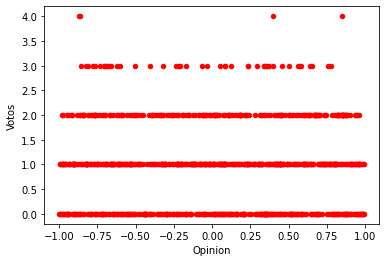

In [13]:

#¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤ Simulacion Basica ¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤#

Muestra_Simulacion = Muestra_Completa.copy() # Creo una copia de la muestra original, por si se crean varias simulaciones diferentes
DataSave = pd.DataFrame(columns=['ID', 'Opinion', 'Votos', 'Vistas']) 
MinutoAMinuto = pd.DataFrame(columns=['Sujeto', 'Opinion Sujeto', 'ID Idea Mostrada', 'Idea Mostrada', 'Otras opiniones que vio', 'Voto', 'Distancia'])
OpinanNoVotan = 0
TiempoSimulacion = 0

for i in Muestra_Simulacion:
    ParticipanteActual = i
    if OpinanNoVotan < QOpinionesExpuestas: # Si hay menos opiniones que las necesarias para mostrar los individuos van a opinar, no votar.
        DataSave.at [OpinanNoVotan,'ID'] = Muestra_Simulacion.get(i).get_ID()
        DataSave.at [OpinanNoVotan,'Opinion'] = Muestra_Simulacion.get(i).get_Oi()
        DataSave.at [OpinanNoVotan,'Votos'] = 0
        DataSave.at [OpinanNoVotan,'Vistas'] = 0
        OpinanNoVotan +=1
    else:
        OpinionesFiltradas = DataSave[DataSave.Vistas < QVecesMuestroOpinion] # Filtro las ideas que tengan menos vistas del limite asignado
        OpinionesFiltradas.sort_values(by=['Vistas'], inplace=True) # Ordeno las ideas de menor a mayor acorde a la cantidad de vistas
        OpinionesParaVotar = OpinionesFiltradas.iloc[:QOpinionesExpuestas, :2] # Creo un dataframe con las ideas que va a ver el sujeto
        Muestra_Simulacion.get(i).append_IdeasVistas (OpinionesParaVotar)
        DataSave.at [i,'ID'] = Muestra_Simulacion.get(i).get_ID()
        DataSave.at [i,'Opinion'] = Muestra_Simulacion.get(i).get_Oi()
        DataSave.at [i,'Votos'] = 0
        DataSave.at [i,'Vistas'] = 0
        VotoActual = Muestra_Simulacion.get(i).votar(OpinionesParaVotar)
        DataSave.at [VotoActual,'Votos'] = DataSave.at [VotoActual,'Votos'] + 1 # Le sumo un voto a la idea.
        for i in OpinionesParaVotar.index:
            DataSave.at [i,'Vistas'] = DataSave.at [i,'Vistas'] + 1 # Le sumo una vista a la ideas expuestas
            
            # Armo un dataframe con el minuto a minuto de lo que fue pasando en la simulacion
            MinutoAMinuto.at [TiempoSimulacion,'Sujeto'] = Muestra_Simulacion.get(ParticipanteActual).get_ID()
            MinutoAMinuto.at [TiempoSimulacion,'Opinion Sujeto'] = Muestra_Simulacion.get(ParticipanteActual).get_Oi()
            MinutoAMinuto.at [TiempoSimulacion,'ID Idea Mostrada'] = i
            MinutoAMinuto.at [TiempoSimulacion,'Idea Mostrada'] = OpinionesParaVotar.at [i,'Opinion']
            CopiaOpiniones = OpinionesParaVotar.index.tolist()
            CopiaOpiniones.remove(i)
            MinutoAMinuto.at [TiempoSimulacion,'Otras opiniones que vio'] = CopiaOpiniones
            if (DataSave.at [VotoActual,'ID']) == (OpinionesParaVotar.at [i,'ID']):
                MinutoAMinuto.at [TiempoSimulacion,'Voto'] = True
            else:
                MinutoAMinuto.at [TiempoSimulacion,'Voto'] = False
            MinutoAMinuto.at [TiempoSimulacion,'Distancia'] = Muestra_Simulacion.get(ParticipanteActual).comparar(OpinionesParaVotar.at [i,'Opinion'])
            TiempoSimulacion +=1           

print (MinutoAMinuto)
print (DataSave.sort_values(by=['Votos'], ascending=False))

DataSave.plot(kind='scatter',x='Opinion',y='Votos',color='red')
#plt.yticks(range(5))
plt.show()